In [1]:
import pandas as pd
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

https://www.superdatascience.com/opencv-face-detection/

In [3]:
%matplotlib inline

In [4]:
import time

In [5]:
def convert_to_RBG(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
#load test iamge
img = cv2.imread('data/nasa.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

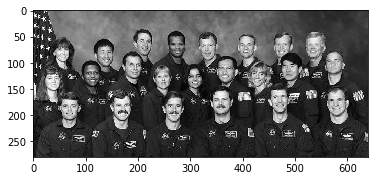

In [12]:
#if you have matplotlib installed then  
plt.imshow(gray_img, cmap='gray')  

# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [20]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          

 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

 return img_copy

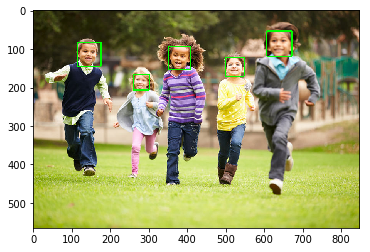

In [31]:
new_path = '/home/esposito/anaconda3/lib/python3.6/site-packages/cv2/'

#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier(new_path + 'data/lbpcascade_frontalface.xml')

#load test image 
test2 = cv2.imread('data/runs.jpg') 

#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test2)  

#convert image to RGB and show image 
plt.imshow(convert_to_RBG(faces_detected_img))

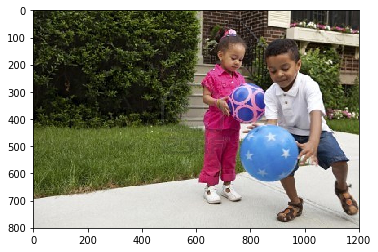

In [23]:
new_path = '/home/esposito/anaconda3/lib/python3.6/site-packages/cv2/'

#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier(new_path + 'data/lbpcascade_frontalface.xml')

#load test image 
test2 = cv2.imread('data/kids.jpg') 

#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test2)  

#convert image to RGB and show image 
plt.imshow(convert_to_RBG(faces_detected_img))

Haar VS LBP

In [25]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml') 
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')  

#load test image1 
test1 = cv2.imread('data/kids.jpg') 
#load test image2 
test2 = cv2.imread('data/kid.jpg')

In [28]:
new_path = '/home/esposito/anaconda3/lib/python3.6/site-packages/cv2/'

#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier(new_path + 'data/haarcascade_frontalface_alt.xml')

In [29]:
#------------HAAR----------- 
#note time before detection 
t1 = time.time()  

#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test1)  

#note time after detection 
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 
#print the time difference

In [32]:
#------------LBP----------- 
#note time before detection 
t1 = time.time() 

#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test1)  

#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference

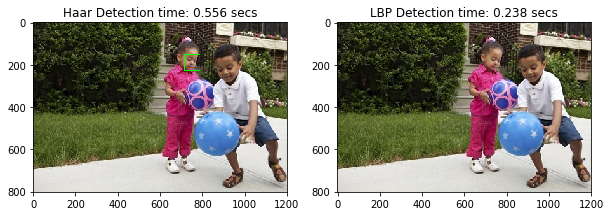

In [35]:
#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  

#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convert_to_RBG(haar_detected_img))  

#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convert_to_RBG(lbp_detected_img))  

#show images 
# plt.imshow(faces_detected_img)